# Simply Notebook to show the idea of a PSD
## The first cell shows a signal X which is generated by added 3 sin waves together. It is impossible to tell what those 3 sin waves by just looking at the singal X

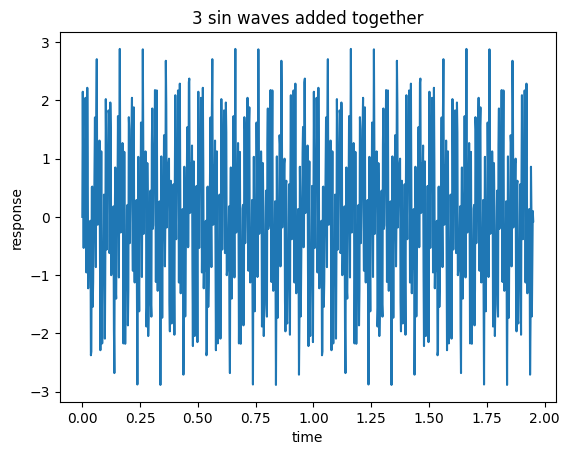

In [1]:
# periodogram stuff
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# added 3 sin waves with a freq of 20, 100, and 150 together
fs = nfft = 512
t = np.arange(1000) / fs
x = np.sin(2*np.pi*20*t) + np.sin(2*np.pi*100*t) + np.sin(2*np.pi*150*t)

#ploting
plt.plot(t,x)
plt.ylabel('response')
plt.xlabel('time')
plt.title('3 sin waves added together')
plt.show()


## When we estimate power spectral density using a periodogram we can clearly see all what sin waves made up our signal X

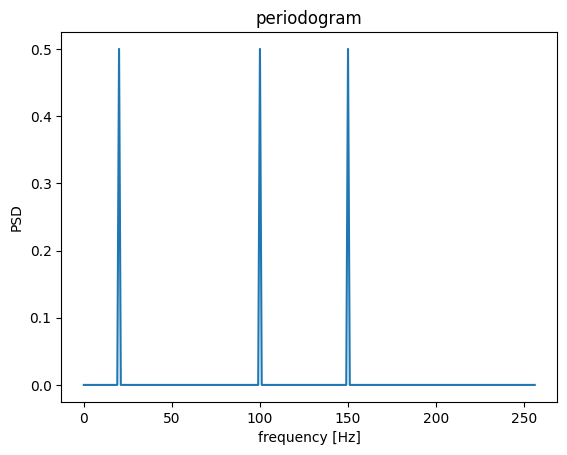

In [2]:

fs = nfft = 512
t = np.arange(1000) / fs
freq, psd = signal.periodogram(x,fs,nfft=nfft)
plt.plot(freq, psd)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.title('periodogram')
plt.show()

# Now here is a way to apply what a PSD is in the field of neuroscience
## Imagine you are a researcher trying to study deep sleep. You need a way to quantify that your patient is in deep sleep. One way you could go about this is by hooking your patient up to a an EEG machine. This machine measures you brainwaves and different phases of sleep have different brain waves. Light sleep is typical associated with alpha(8-13 Hz) and theta(4-7 Hz) brain waves, while deep sleep is assoicated with delta(0.5-4 Hz) waves. Below is an example of a brain wave during sleep but what phase of sleep in the patient currently in?

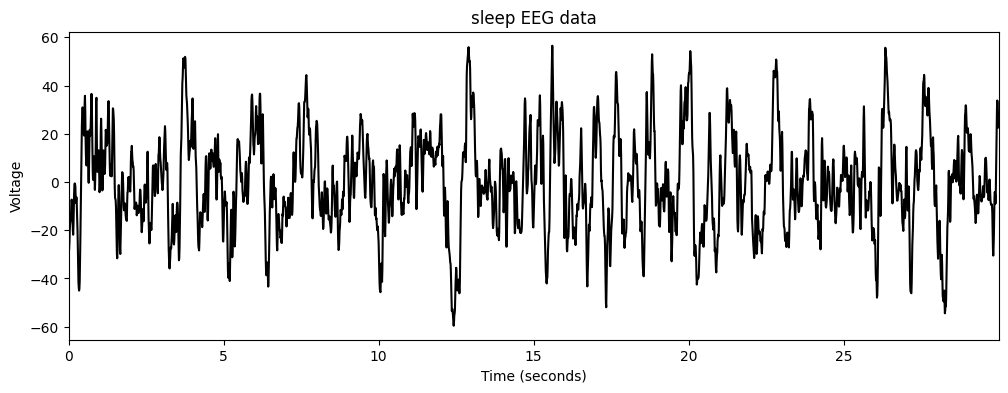

In [3]:
import os
if os.path.isfile('data.txt'): 
    data = np.loadtxt('data.txt')
else:
    !git clone https://github.com/GregGlickert/8001 &> /dev/null
    %cd 8001/PSD 
    data = data = np.loadtxt('data.txt')

# Define sampling frequency and time vector
sf = 100.
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('sleep EEG data')
plt.show()

## Much like the first example there is no way to tell what waves are present in the sigal just by looking with your eyes at the raw signal. We need to process that data in order to tell what wave is hiding in the data. Let us apply a PSD to the wave and see what happens

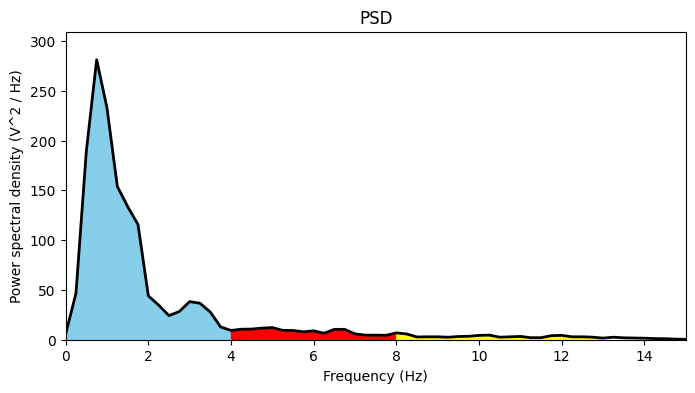

In [6]:
# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("PSD")
plt.xlim([0, 15])
idx_delta = np.logical_and(freqs >= 0, freqs <= 4)
idx_theta = np.logical_and(freqs >= 4, freqs <= 8)
idx_alpha = np.logical_and(freqs >= 8, freqs <= 13)
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.fill_between(freqs, psd, where=idx_theta, color='red')
plt.fill_between(freqs, psd, where=idx_alpha, color='yellow')
plt.show()

## We can see a huge bump in the PSD around the 0.5-4 Hz colored in blue range which is in our delta wave band. This shows that the patient is currently in delta sleep and as a researcher you could begain your expierment on deep sleep.